# NLP - Disaster Data

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [2]:
print("Training Data:")
print("Shape - {}".format(train_data.shape))
print("Columns - {}".format(train_data.columns))
print("Memory Usage - {:.2f} MB".format(train_data.memory_usage().sum() / 1024**2))

print("\nTesting Data:")
print("Shape - {}".format(test_data.shape))
print("Columns - {}".format(test_data.columns))
print("Memory Usage - {:.2f} MB".format(test_data.memory_usage().sum() / 1024**2))


Training Data:
Shape - (7613, 5)
Columns - Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Memory Usage - 0.29 MB

Testing Data:
Shape - (3263, 4)
Columns - Index(['id', 'keyword', 'location', 'text'], dtype='object')
Memory Usage - 0.10 MB


In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print("Distinct keywords for test data: {}".format(test_data.keyword.drop_duplicates().count()))
print("Distinct keywords for test data: {}".format(train_data.keyword.drop_duplicates().count()))

Distinct keywords for test data: 221
Distinct keywords for test data: 221


In [6]:
# Find count of words that are in both 
keywords = []
for word in test_data.keyword.drop_duplicates():
    keywords.append(word)
for word in train_data.keyword.drop_duplicates():
    if word not in keywords:
        keywords.append(word)

print("Count of words in training data that aren't in test data: {}".format(len(keywords) - test_data.keyword.drop_duplicates().count()))

Count of words in training data that aren't in test data: 1


Both datasets have the same number of keywords. There is one keyword in training dataset that isn't in testing dataset. 

In [7]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

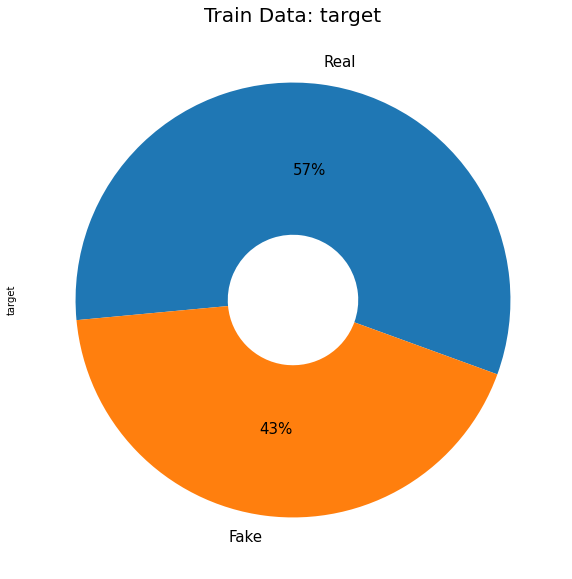

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plt.title("Train Data: target", fontsize=20)
train_data.target.value_counts().plot(kind="pie",
                                    labels=["Real", "Fake"],
                                    wedgeprops=dict(width=.7),
                                    autopct="%1.0f%%",
                                    startangle=-20,
                                    textprops={"fontsize": 15})

There are a few more real examples than there are fake ones, it's good that it's a faily even split, it will be good to have plenty of both instances to work with.

Now we preprocess the data.

In [9]:
train_data.text.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [10]:
!pip install nltk==3.5
import nltk; nltk.download("stopwords")
!pip install textblob==0.15.3
!python -m textblob.download_corpora

def preprocessing_data(data):
    # Change all text to lowercase
    data.text = data.text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove punctuation 
    data.text = data.text.str.replace("[^\w\s]","")

    # Remove stopwords
    from nltk.corpus import stopwords
    stop = stopwords.words("english")
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # Lemmatize words
    from textblob import Word
    data.text = data.text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    # Remove words with length below 3
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

    # Remove rare words
    freq = pd.Series(" ".join(data).split()).value_counts()[-10:]
    freq = list(freq.index)
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

    # Remove common words
    freq = pd.Series(" ".join(data).split()).value_counts()[:10]
    freq = list(freq.index) 
    data.text = data.text.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

    return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [11]:
train_data = preprocessing_data(train_data)
test_data = preprocessing_data(test_data)

In [12]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [13]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different city stay safe ever...
2,3,NaN,NaN,forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill china taiwan


In [14]:
from sklearn import feature_extraction
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

## Logistic Regression

In [15]:
vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data["text"])
test_vectors = vectorizer.transform(test_data["text"])

print(train_vectors.shape)
print(test_vectors.shape)

(7613, 20858)
(3263, 20858)


In [16]:
# create logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(train_vectors, train_data["target"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# save the predictions on the testing data to submit to kaggle
df = pd.DataFrame()
test_preds = model.predict(test_vectors)
df["id"] = test_data["id"]
df["target"] = test_preds
df.to_csv("logistic_regression.csv", index=False)

## SVM

In [18]:
X_train = train_data["text"]
y_train = train_data["target"]
X_test = test_data["text"]

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [19]:
from sklearn import svm

svm = svm.SVC(C=100)

svm.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
X_test = vectorizer.transform(X_test)
test_preds = svm.predict(X_test)

df = pd.DataFrame()
df["id"] = test_data["id"]
df["target"] = test_preds 
df.to_csv("svm.csv", index=False)

## LSTM

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [22]:
# The maximum number of words to be used. (most frequent)
MAX_SEQUENCE_LENGTH = 25
EMBEDDING_DIM = 128

tokenizer = Tokenizer(lower=False)
tokenizer.fit_on_texts(train_data['text'].values)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens")

Found 20956 unique tokens


In [23]:
X_train = tokenizer.texts_to_sequences(train_data['text'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
Y_train = train_data['target'].values
Y_train = Y_train.reshape((-1, 1))

X_test = tokenizer.texts_to_sequences(test_data['text'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(7613, 25) (7613, 1)
(3263, 25)


In [24]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_counts) + 1, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 128)           2682496   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [25]:
epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 8s 37ms/step - loss: 0.6894 - accuracy: 0.5469 - val_loss: 0.6882 - val_accuracy: 0.5345
Epoch 2/10
96/96 [==============================] - 3s 31ms/step - loss: 0.6656 - accuracy: 0.5787 - val_loss: 0.6675 - val_accuracy: 0.5469
Epoch 3/10
96/96 [==============================] - 3s 30ms/step - loss: 0.6196 - accuracy: 0.6757 - val_loss: 0.5950 - val_accuracy: 0.7150
Epoch 4/10
96/96 [==============================] - 3s 30ms/step - loss: 0.4718 - accuracy: 0.8141 - val_loss: 0.4745 - val_accuracy: 0.7787
Epoch 5/10
96/96 [==============================] - 3s 30ms/step - loss: 0.3159 - accuracy: 0.8799 - val_loss: 0.4788 - val_accuracy: 0.7702
Epoch 6/10
96/96 [==============================] - 3s 30ms/step - loss: 0.2388 - accuracy: 0.9085 - val_loss: 0.5217 - val_accuracy: 0.7511
Epoch 7/10
96/96 [==============================] - 3s 29ms/step - loss: 0.1946 - accuracy: 0.9266 - val_loss: 0.5118 - val_accuracy: 0.7669
Epoch 8/10
96

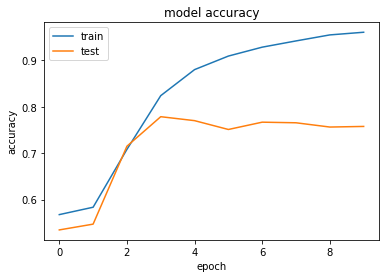

In [26]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

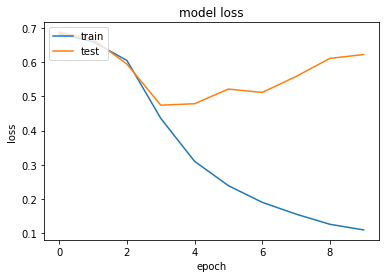

In [27]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
df = pd.DataFrame()
raw_preds = model.predict(X_test)
test_preds = np.where(raw_preds > 0.5, 1, 0)
df["id"] = test_data["id"]
df["target"] = test_preds
df.to_csv("lstm.csv", index=False)

In [29]:
# nice - this gets 0.77811 accuracy

## Bidirectional LSTM

In [30]:
from keras.layers import Bidirectional

In [43]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(len(tokenizer.word_counts) + 1, EMBEDDING_DIM, input_length=X_train.shape[1]))
bi_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(64)))
bi_lstm_model.add(Dense(16, activation='relu'))
bi_lstm_model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.00002)
bi_lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(bi_lstm_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 128)           2682496   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 25, 128)           98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 2,882,209
Trainable params: 2,882,209
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
epochs = 10
batch_size = 64

history = bi_lstm_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
96/96 [==============================] - 10s 49ms/step - loss: 0.6874 - accuracy: 0.5817 - val_loss: 0.6885 - val_accuracy: 0.5345
Epoch 2/10
96/96 [==============================] - 4s 38ms/step - loss: 0.6783 - accuracy: 0.5827 - val_loss: 0.6889 - val_accuracy: 0.5345
Epoch 3/10
96/96 [==============================] - 3s 36ms/step - loss: 0.6769 - accuracy: 0.5722 - val_loss: 0.6885 - val_accuracy: 0.5345
Epoch 4/10
96/96 [==============================] - 3s 36ms/step - loss: 0.6756 - accuracy: 0.5687 - val_loss: 0.6861 - val_accuracy: 0.5345
Epoch 5/10
96/96 [==============================] - 3s 36ms/step - loss: 0.6685 - accuracy: 0.5719 - val_loss: 0.6793 - val_accuracy: 0.5345
Epoch 6/10
96/96 [==============================] - 4s 37ms/step - loss: 0.6483 - accuracy: 0.5865 - val_loss: 0.6606 - val_accuracy: 0.5712
Epoch 7/10
96/96 [==============================] - 3s 36ms/step - loss: 0.6157 - accuracy: 0.6742 - val_loss: 0.6326 - val_accuracy: 0.6684
Epoch 8/10
9

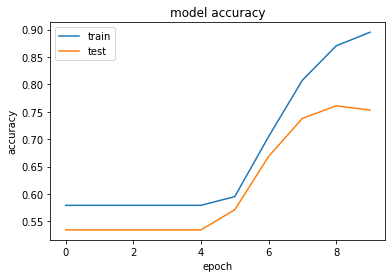

In [45]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

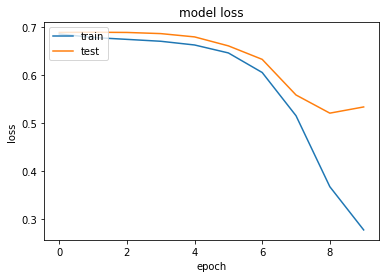

In [46]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
df = pd.DataFrame()
raw_preds = bi_lstm_model.predict(X_test)
test_preds = np.where(raw_preds > 0.5, 1, 0)
df["id"] = test_data["id"]
df["target"] = test_preds
df.to_csv("bi_dir_lstm.csv", index=False)

In [36]:
# this gets about 0.79. Not much improvement